## Correlation Analysis of all patients data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from preepiseizures.src import Patient, biosignal_processing



In [2]:
patient = 'BLIW'

patient_info = Patient.patient_class(patient)
corr_data = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s.parquet'))

data = pd.read_parquet('data/respiration/{patient}_all_respiration_data.parquet'.format(patient=patient))
data['datetime'] += pd.Timedelta(patient_info.patient_dict['temporal_shift']) 

In [14]:
resp_rate = pd.DataFrame()

for i in range(len(corr_data)):
    start_time = corr_data.iloc[i].name
    data_segment = data.loc[data['datetime'].between(start_time, start_time + pd.Timedelta(minutes=1))]['RESP'].copy()
    rate = biosignal_processing.resp_rate(data_segment, sampling_rate=80, overlap=60, window_size=60)
    resp_rate = pd.concat([resp_rate, pd.DataFrame({'rate': rate[0], 'datetime': start_time})], ignore_index=True)
corr_data = corr_data.merge(resp_rate, left_index=True, right_on='datetime')


/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/saraiva/dev/PreEpiSeizuresCode/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [21]:
fig = px.scatter(corr_data, x='datetime', y='rate', title='Respiration rate during seizures', color='corr')
fig.show()

In [29]:
corr_data.loc[corr_data['resp_rate_level'] == 'good']

,corr,rate,datetime,resp_rate_level,corr_level
2123,0.945408,NaN,2022-10-27 00:13:19.911898314,good,>=0.7
2124,0.954731,NaN,2022-10-27 00:14:19.911944341,good,>=0.7
2125,0.976037,NaN,2022-10-27 00:15:19.911990368,good,>=0.7


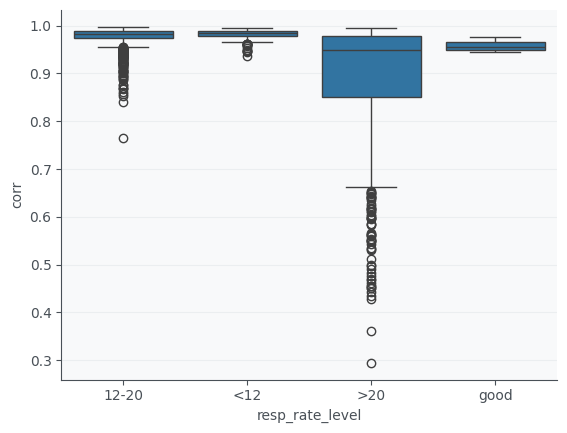

In [37]:
sns.boxplot(x='resp_rate_level', y='corr', data=corr_data)
plt.show()

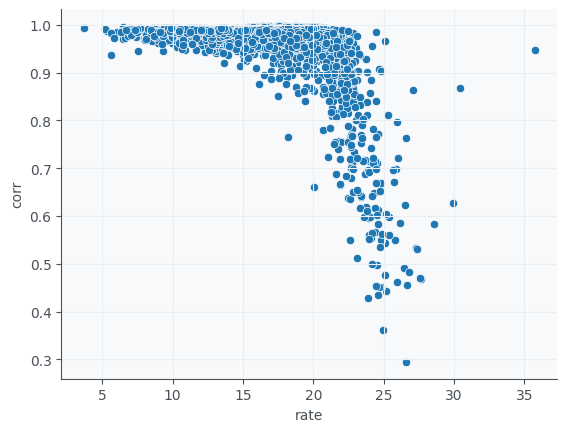

In [32]:
sns.scatterplot(x='rate', y='corr', data=corr_data)
plt.show()

<Axes: xlabel='corr_level', ylabel='rate'>

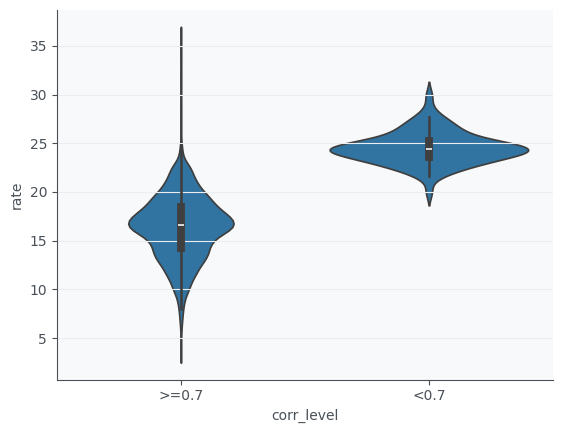

In [31]:
sns.violinplot(x='corr_level', y='rate', data=corr_data)

<Axes: xlabel='rate', ylabel='Count'>

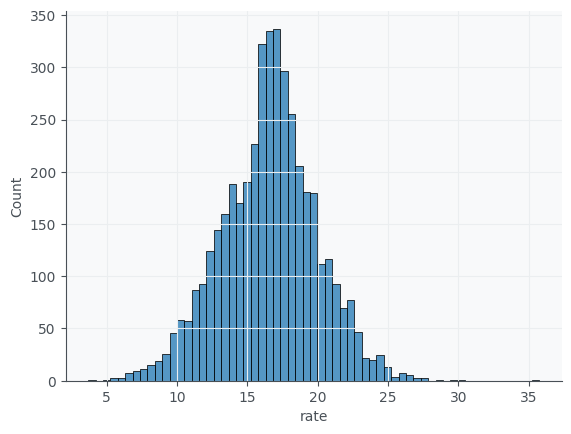

In [36]:
sns.histplot(corr_data['rate'])

## Analysis of all patients

In [89]:
corr_all = pd.DataFrame()
patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]
for patient in sorted(patients):
    corr_points_patient = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s.parquet'))
    corr_points_patient['datetime'] = corr_points_patient.index
    corr_points_patient['patient'] = patient
    corr_points_patient['length'] = len(corr_points_patient)
    #print(patient, np.round(corr_points_patient['corr'].mean(),2), np.round(corr_points_patient['corr'].std(),2))
    corr_all = pd.concat([corr_all, corr_points_patient], ignore_index=True)

In [90]:
corr_all.sort_values(by='length', ascending=True, inplace=True)

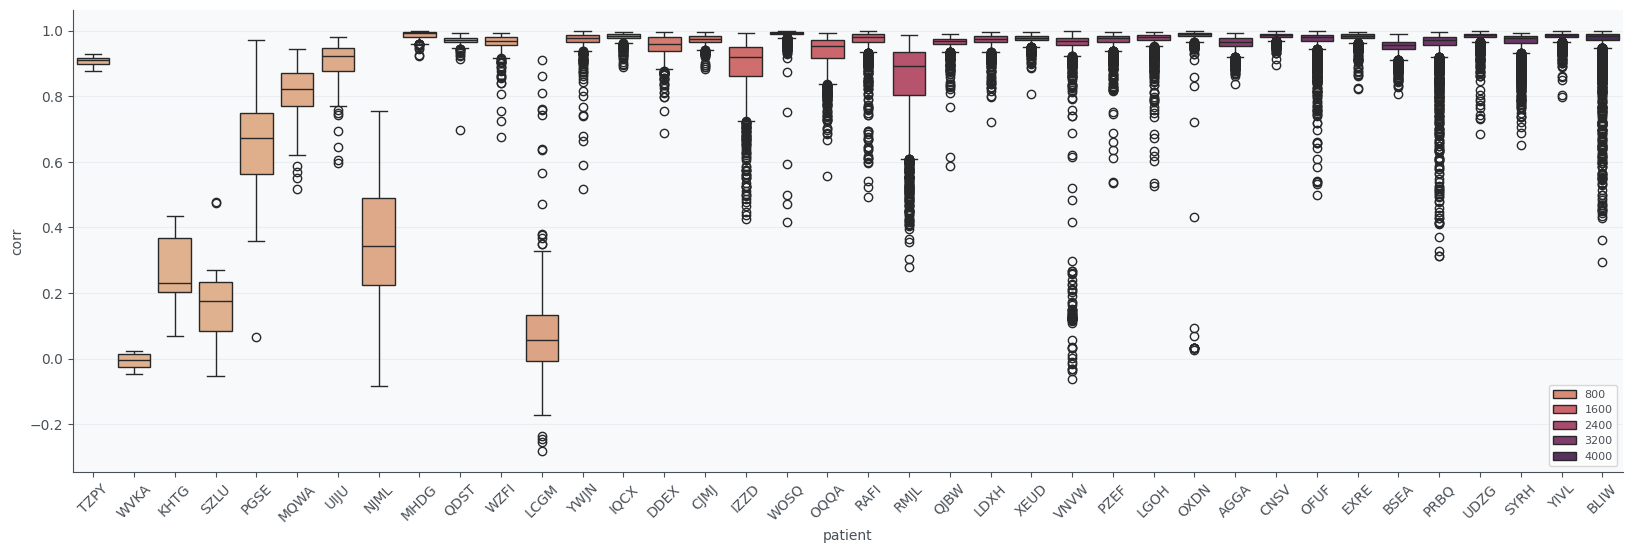

In [106]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=corr_all, x='patient', y='corr', hue='length', palette='flare')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig('data/figures/corr_boxplot_color_dots.pdf', dpi=300)

In [43]:


patients = [file.split('_')[0] for file in os.listdir('data/autoencoders_epilepsy/') if file.endswith('corr_points_1s.parquet')]
for patient in sorted(patients):
    print('Processing patient', patient)
    patient_info = Patient.patient_class(patient)
    corr_data = pd.read_parquet(os.path.join('data/autoencoders_epilepsy', patient + '_corr_points_1s.parquet'))

    data = pd.read_parquet('data/respiration/{patient}_all_respiration_data.parquet'.format(patient=patient))
    data['datetime'] += pd.Timedelta(patient_info.patient_dict['temporal_shift']) 
    resp_rate = pd.DataFrame()

    for i in range(len(corr_data)):
        print(f'{i}/{len(corr_data)}', end='\r')
        start_time = corr_data.iloc[i].name
        data_segment = data.loc[data['datetime'].between(start_time, start_time + pd.Timedelta(minutes=1))]['RESP'].copy()
        rate = biosignal_processing.resp_rate(data_segment, sampling_rate=80, overlap=60, window_size=60)
        resp_rate = pd.concat([resp_rate, pd.DataFrame({'rate': rate[0], 'datetime': start_time})], ignore_index=True)

    corr_data = corr_data.merge(resp_rate, left_index=True, right_on='datetime')
    corr_data.to_parquet('data/autoencoders_epilepsy/{patient}_corr_points_1s_resp_rate.parquet'.format(patient=patient))


Processing patient AGGA


KeyboardInterrupt: 